### Import required library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load the dataset

In [3]:
df = pd.read_csv('churn_dataset.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x :x.replace(' ','0'))

In [10]:
df[df['TotalCharges']=='0']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [11]:
df.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],axis=0,inplace=True)

In [12]:
df[df['TotalCharges']=='0']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [14]:
df = df.drop('customerID', axis=1)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7032, 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


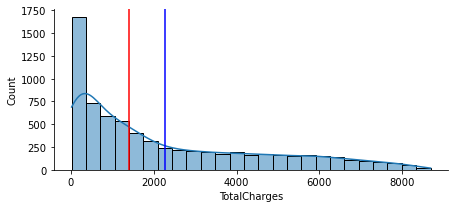

In [19]:
# visualize the TotalCharges column



sns.displot(data = df, x = df.TotalCharges.astype(float), height = 3, aspect = 15/7, kde = True)
plt.axvline(df.TotalCharges.astype(float).mean(), color = 'blue')
plt.axvline(df.TotalCharges.astype(float).median(), color = 'red');

In [20]:
df.groupby(['InternetService'])['MonthlyCharges'].mean()
df.groupby(['InternetService'])['MonthlyCharges'].median()

InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64

InternetService
DSL            56.150
Fiber optic    91.675
No             20.150
Name: MonthlyCharges, dtype: float64

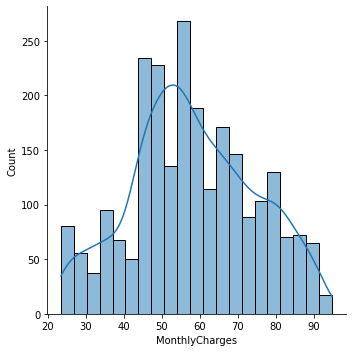

In [21]:
sns.displot(df[df.InternetService == 'DSL']['MonthlyCharges'], kde = True)

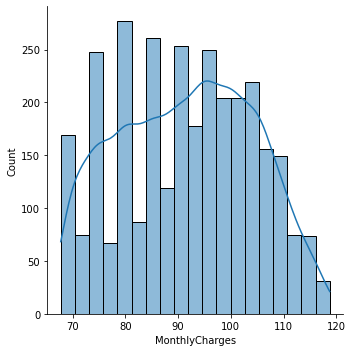

In [22]:
sns.displot(df[df.InternetService == 'Fiber optic']['MonthlyCharges'], kde = True)

In [23]:
df.groupby(['Contract'])['TotalCharges'].sum()

Contract
Month-to-month    5305861.5
One year          4467053.5
Two year          6283253.7
Name: TotalCharges, dtype: float64

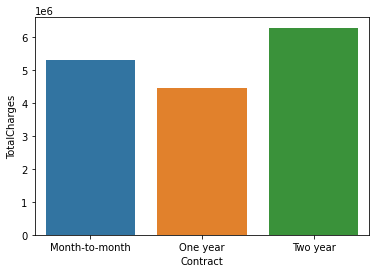

In [24]:
sns.barplot(data = df, x = 'Contract', y = 'TotalCharges', estimator=np.sum, ci=None);

### Identifying the inputs variable (x) and output/Target variable (y)

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
# Churn is target/output variable denoted by y
y = df['Churn']

# These columns are input variables denoted by x 
x = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [27]:
# Target variable is already given 
# this is supervise learning and the task is Classification Task 
# because given target/output variable is categorical.

### split into train and test dataset

In [28]:
# split into train and test dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, train_size= 0.75, random_state=0)

In [29]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3540,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.65,7726.35
3504,Male,0,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.70
6715,Female,0,No,No,11,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,990.30
2866,Female,0,No,No,12,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,1017.35
6609,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.10


In [30]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5561,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65
5814,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25
2645,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.80,19.80
3983,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.25,24.25
6438,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40


In [31]:
x_train.shape 
y_train.shape

x_test.shape
y_test.shape

(5274, 19)

(5274,)

(1758, 19)

(1758,)

### Train data seperating categorical and numerical colunm

In [32]:
x_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [33]:
x_train_cat = x_train.select_dtypes(include=['object'])

In [34]:
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,Female,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [35]:
x_train_num = x_train.select_dtypes(include=['int64','float64'])

In [36]:
x_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,0,72,108.65,7726.35
3504,0,68,19.95,1377.70
6715,0,11,89.20,990.30
2866,0,12,84.60,1017.35
6609,0,1,20.10,20.10
...,...,...,...,...
4939,0,1,18.90,18.90
3269,0,65,24.80,1600.95
1658,0,50,105.95,5341.80
2612,0,14,80.45,1137.05


### Train Data preperation 

### scaling the numerical features

In [37]:
x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,0,72,108.65,7726.35
3504,0,68,19.95,1377.70
6715,0,11,89.20,990.30
2866,0,12,84.60,1017.35
6609,0,1,20.10,20.10


In [38]:
# scaling the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [39]:
x_train_num_rescaler = pd.DataFrame(scaler.fit_transform(x_train_num),columns=x_train_num.columns,
                                    index = x_train_num.index )

x_train_num_rescaler.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,-0.436793,1.628149,1.460662,2.416469
3504,-0.436793,1.464856,-1.495682,-0.392705
6715,-0.436793,-0.862073,0.812400,-0.564123
2866,-0.436793,-0.821250,0.659083,-0.552154
6609,-0.436793,-1.270306,-1.490683,-0.993420


### Applying OneHotEncoding to categorical column

In [40]:
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,Female,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [41]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse=False)

In [42]:
x_train_cat_OHE = pd.DataFrame(encoder.fit_transform(x_train_cat),columns=encoder.get_feature_names(x_train_cat.columns),
                              index=x_train_cat.index)

x_train_cat_OHE.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


###   concatinating Train data numerical and categorical features

In [43]:
x_train_transformed = pd.concat([x_train_num_rescaler,x_train_cat_OHE], axis=1)

In [44]:
x_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,-0.436793,1.628149,1.460662,2.416469,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,-0.436793,1.464856,-1.495682,-0.392705,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,-0.436793,-0.862073,0.812400,-0.564123,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,-0.436793,-0.821250,0.659083,-0.552154,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,-0.436793,-1.270306,-1.490683,-0.993420,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### prepering on Test data

In [45]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5561,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65
5814,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25
2645,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.80,19.80
3983,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.25,24.25
6438,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40


In [46]:
x_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [47]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 5561 to 2843
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1758 non-null   object 
 1   SeniorCitizen     1758 non-null   int64  
 2   Partner           1758 non-null   object 
 3   Dependents        1758 non-null   object 
 4   tenure            1758 non-null   int64  
 5   PhoneService      1758 non-null   object 
 6   MultipleLines     1758 non-null   object 
 7   InternetService   1758 non-null   object 
 8   OnlineSecurity    1758 non-null   object 
 9   OnlineBackup      1758 non-null   object 
 10  DeviceProtection  1758 non-null   object 
 11  TechSupport       1758 non-null   object 
 12  StreamingTV       1758 non-null   object 
 13  StreamingMovies   1758 non-null   object 
 14  Contract          1758 non-null   object 
 15  PaperlessBilling  1758 non-null   object 
 16  PaymentMethod     1758 non-null   objec

### Test data seperating categorical and numerical colunms

In [48]:
x_test_cat = x_test.select_dtypes(include=['object'])

x_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
5814,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
2645,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)
3983,Male,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6438,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [49]:
x_test_cat.shape

(1758, 15)

In [50]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])

x_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,0,1,20.65,20.65
5814,0,16,20.60,330.25
2645,0,1,19.80,19.80
3983,0,1,24.25,24.25
6438,1,1,74.40,74.40


In [51]:
x_test_num.shape

(1758, 4)

### scaling numerical data

In [52]:
x_test_num_rescale = pd.DataFrame(scaler.fit_transform(x_test_num),columns=x_test_num.columns,
                                  index=x_test_num.index)

x_test_num_rescale.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,-0.450872,-1.311071,-1.453192,-1.013737
5814,-0.450872,-0.702885,-1.454841,-0.878277
2645,-0.450872,-1.311071,-1.481222,-1.014109
3983,-0.450872,-1.311071,-1.334475,-1.012162
6438,2.217925,-1.311071,0.319325,-0.990219


### OHE Test data

In [53]:
x_test_cat_OHE = pd.DataFrame(encoder.fit_transform(x_test_cat),columns=encoder.get_feature_names
                              (x_test_cat.columns),index=x_test_cat.index)

x_test_cat_OHE.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### concatinating Test data  numerical and categorical features

In [54]:
x_test_transformed = pd.concat([x_test_num_rescale,x_test_cat_OHE],axis=1)

x_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-0.450872,-1.311071,-1.453192,-1.013737,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,-0.450872,-0.702885,-1.454841,-0.878277,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,-0.450872,-1.311071,-1.481222,-1.014109,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,-0.450872,-1.311071,-1.334475,-1.012162,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,2.217925,-1.311071,0.319325,-0.990219,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
x_test_transformed.shape

(1758, 30)

### Logistic Regression

In [56]:
from sklearn import metrics

In [57]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [58]:
reg.fit(x_train_transformed, y_train)

LogisticRegression()

In [59]:
y_test_pred = reg.predict(x_test_transformed)

In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes


In [61]:
metrics.accuracy_score(y_test,y_test_pred)

0.8128555176336746

### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [63]:
knn.fit(x_train_transformed, y_train)

KNeighborsClassifier()

In [64]:
y_test_pred = knn.predict(x_test_transformed)

In [65]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,No
6438,Yes,Yes


In [66]:
metrics.accuracy_score(y_test,y_test_pred)

0.7588168373151308

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [68]:
dtree.fit (x_train_transformed, y_train )

DecisionTreeClassifier()

In [69]:
y_test_pred = dtree.predict ( x_test_transformed )

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5561,No,Yes
5814,No,No
2645,No,No
3983,Yes,No
6438,Yes,Yes


In [71]:
metrics.accuracy_score(y_test,y_test_pred)

0.7263936291240045

### Suppote vector machine 

In [72]:
from sklearn.svm import SVC

svm = SVC()

In [73]:
svm.fit(x_train_transformed,y_train)

SVC()

In [74]:
y_test_pred = svm.predict(x_test_transformed)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test,'predicted':y_test_pred})

temp_df.head()

,Actual,predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes


In [76]:
metrics.accuracy_score(y_test,y_test_pred)

0.8071672354948806

### Random forest classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()

In [81]:
rfm.fit(x_train_transformed,y_train )

RandomForestClassifier()

In [82]:
y_test_pred= rfm.predict(x_test_transformed)

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5561,No,No
5814,No,No
2645,No,No
3983,Yes,Yes
6438,Yes,Yes


In [84]:
metrics.accuracy_score(y_test,y_test_pred)

0.7957906712172924

### Above the churn data prediction, used five different types of algorithum but best accuracy comes to Logistics regressior
